In [71]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
glims = pd.read_csv('TestingDataSet_v1.csv')

In [2]:
glims.head()

,ANLYS_ID,GLAC_ID,AREA,DB_AREA,WIDTH,LENGTH,PRIMECLASS,MIN_ELEV,MEAN_ELEV,MAX_ELEV,...,WGMS_ID,LOCAL_ID,GLAC_STAT,GEOG_AREA,PARENT_ID,DATE,YEAR,MONTH,longitude,latitude
0,101215,G286929E46788S,12.4259,12.4292,0.0,4786.66,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.071,-46.788
1,101886,G286929E46788S,13.1393,13.1428,0.0,4786.66,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,2001-08-04 00:00:00,2001,8,-73.071,-46.788
2,102506,G286929E46788S,15.3202,15.3244,0.0,5285.27,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,1870-01-01 00:00:00,1870,1,-73.071,-46.788
3,107884,G286929E46788S,13.6053,13.6089,0.0,5270.57,0,0,0,0,...,None,CLGC-9,exists,Antarctic Peninsula,NaN,1986-01-14 00:00:00,1986,1,-73.071,-46.788
4,101146,G286719E46755S,80.2842,80.3127,0.0,10225.60,0,0,0,0,...,None,NPI-32,exists,Antarctic Peninsula,NaN,2007-09-06 00:00:00,2007,9,-73.281,-46.755


In [3]:
ids = glims.GLAC_ID.unique()

In [11]:
#SLR or MLR?
#MLR with year and absolute value of latitude as predictors of area
dfEx = glims.loc[glims['GLAC_ID']==ids[0]]
dfEx = dfEx[['DB_AREA','YEAR','latitude']] #only select 3 columns
dfEx = dfEx.abs() #absolute value
import statsmodels.api as sm 
X = dfEx[['YEAR','latitude']]
# Add a constant to the array for the intecept 
X = sm.add_constant(X) 
y = dfEx['DB_AREA']
model = sm.OLS(y, X).fit()

In [12]:
model.summary()
#Strong collinearity, not well suited for MLR

C:\Users\Chloe\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DB_AREA   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     24.06
Date:                Fri, 03 May 2019   Prob (F-statistic):             0.0391
Time:                        18:32:55   Log-Likelihood:               -0.79919
No. Observations:                   4   AIC:                             5.598
Df Residuals:                       2   BIC:                             4.371
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
YEAR          -0.0183      0.004     -4.905      0.039      -0.034      -0.002
latitude       1.0609      0.157      6.758      0.021       0.385       1.736
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.659
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.351
Skew:                          -0.413   Prob(JB):                        0.839
Kurtosis:                       1.806   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
len(ids)

4390

In [45]:
#SLR
#data frame to store results
results = pd.DataFrame(columns=['id', 'geog_area', 'slope','intercept','stderror','pval'])
from scipy import stats
for i in ids:
    dfEx = glims.loc[glims['GLAC_ID']==i]
    glacId = dfEx.iloc[0,1]
    area = dfEx.iloc[0,16]
    bhat, ahat, rval, p, stderr = stats.linregress(dfEx["YEAR"], dfEx["DB_AREA"])
    data = pd.DataFrame([{'id': glacId, 'geog_area': area, 'slope': bhat, 'intercept': ahat, 'stderror': stderr, 'pval': p}])
    results = results.append(data)

In [48]:
l = np.array(range(len(results)))
results.set_index(l, inplace=True)
results

,geog_area,id,intercept,pval,slope,stderror
0,Antarctic Peninsula,G286929E46788S,49.638132,0.039139,-0.018317,0.003734
1,Antarctic Peninsula,G286719E46755S,600.380219,0.006041,-0.262915,0.057620
2,Antarctic Peninsula,G286570E46600S,395.926050,0.032993,-0.135465,0.046384
3,Antarctic Peninsula,G286829E48560S,132.114842,0.131107,-0.045552,0.022079
4,Antarctic Peninsula,G287590E47667S,54.611658,0.015945,-0.024578,0.004979
5,Antarctic Peninsula,G290552E54592S,-4.760517,0.821891,0.015551,0.063341
6,Antarctic Peninsula,G286431E47184S,671.791243,0.002315,-0.200528,0.029068
7,Antarctic Peninsula,G290587E54704S,172.205667,0.002078,-0.082368,0.008170
8,Antarctic Peninsula,G286716E46597S,287.830274,0.101906,-0.101061,0.050524
9,Antarctic Peninsula,G286599E47361S,409.107784,0.002465,-0.166188,0.029561


In [47]:
#what are the geographic areas of the results?
results.geog_area.unique()

array(['Antarctic Peninsula', 'Northern Cordillera',
       'Randolph Glacier Inventory; Umbrella RC for merging the RGI into GLIMS',
       'Various (NSIDC)', 'Various (GlobGlacier)', 'French Alps',
       'Himalaya (India, Nepal, Bhutan)', 'Conterminous USA',
       'Swiss Alps', 'Austrian Alps', 'Caucausus Region'], dtype=object)

In [50]:
#how many pvals are < 0.1?
#2518/4390
sigresults = results.loc[results['pval'] <= 0.1]
sigresults.geog_area.unique()

array(['Antarctic Peninsula',
       'Randolph Glacier Inventory; Umbrella RC for merging the RGI into GLIMS',
       'Various (NSIDC)', 'Various (GlobGlacier)', 'French Alps',
       'Conterminous USA', 'Himalaya (India, Nepal, Bhutan)',
       'Swiss Alps', 'Austrian Alps', 'Caucausus Region'], dtype=object)

In [52]:
#geographic areas
antarctic = sigresults.loc[sigresults['geog_area'] == 'Antarctic Peninsula']
alps = sigresults.loc[(sigresults['geog_area'] == 'French Alps') | (sigresults['geog_area'] == 'Swiss Alps') | (sigresults['geog_area'] == 'Austrian Alps')]
usa = sigresults.loc[sigresults['geog_area'] == 'Conterminous USA']
himalaya = sigresults.loc[sigresults['geog_area'] == 'Himalaya (India, Nepal, Bhutan)']
caucasus = sigresults.loc[sigresults['geog_area'] == 'Caucausus Region']

Antarctic: 261

Alps: 1775

USA: 4

Himalaya: 78

Caucasus: 316

Text(0, 0.5, 'Count')

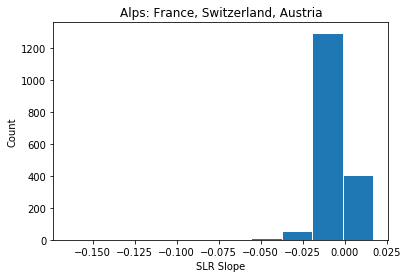

In [75]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(alps['slope'], bins = 10, edgecolor='white')
plt.title('Alps: France, Switzerland, Austria')
plt.xlabel('SLR Slope')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

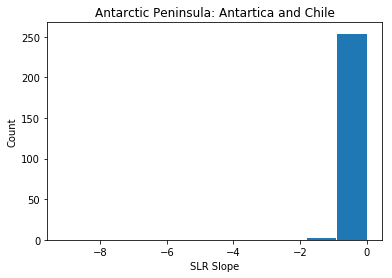

In [76]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(antarctic['slope'], bins = 10, edgecolor='white')
plt.title('Antarctic Peninsula: Antartica and Chile')
plt.xlabel('SLR Slope')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

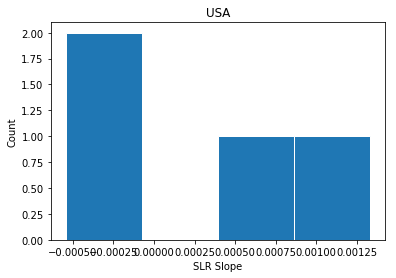

In [79]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(usa['slope'], bins = 4, edgecolor='white')
plt.title('USA')
plt.xlabel('SLR Slope')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

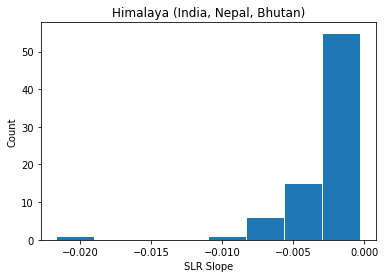

In [81]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(himalaya['slope'], bins = 8, edgecolor='white')
plt.title('Himalaya (India, Nepal, Bhutan)')
plt.xlabel('SLR Slope')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

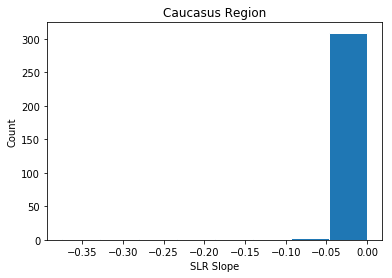

In [86]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(caucasus['slope'], bins = 8, edgecolor='white')
plt.title('Caucasus Region')
plt.xlabel('SLR Slope')
plt.ylabel('Count')

Median slopes by region

antarctic = -0.029

alps = -0.003

usa = 0.0002

himalaya = -0.002

caucasus = -0.006

Mean slopes by region

antarctic = -0.129

alps = -0.0055

usa = 0.0003

himalaya = -0.0028

caucasus = -0.012